In [1]:
import os

In [24]:
from data.dataset import Dataset
from data.feature import Featurizer
from data.dataloader import DataLoader
from methods.ridge_method import RidgeMethod
from methods.bayesian_method import BayesianRidgeMethod
from methods.decision_tree_method import DecisionTreeMethod
from methods.elasticnet_method import ElasticNetMethod
from methods.mlp_method import MlpMethod
from methods.lasso_method import LassoMethod
from methods.random_forest_method import RandomForestMethod
from methods.knn_method import KnnMethod
from methods.lasso_lars_method import LassoLarsMethod
from methods.pca_method import PCAAnalysis

import numpy as np
from visualize import visualize_energy

In [71]:
from methods.preprocessing.pca import PCAMethod

In [74]:
methods = [RidgeMethod, BayesianRidgeMethod, DecisionTreeMethod, ElasticNetMethod, LassoMethod, RandomForestMethod, KnnMethod, LassoLarsMethod]

In [3]:
featurizer = Featurizer()
#trimer_dataset = Dataset.from_file('xe3_50.xyz', 3, featurizer)
#energy_base = trimer_dataset[-1][1][0]
dimer_dataset = Dataset.from_file('dataset/xe2_50.xyz', 2, featurizer)
trimer_dataset = Dataset.from_file('dataset/xe3_50.xyz', 3, featurizer)
rand_trimer_dataset = Dataset.from_file('dataset/xe3_dataset_dft.xyz', 3, featurizer)

In [70]:
dimer_train, dimer_val = dimer_dataset.split(
    [list(range(40)),
     list(range(40, 50))])
trimer_train, trimer_val = trimer_dataset.split(
    [list(range(40)),
     list(range(40, 50))])
rand_trimer_train, rand_trimer_val = rand_trimer_dataset.split(
    [list(range(5000)), 
     list(range(5000, len(rand_trimer_dataset)))])
train = DataLoader([dimer_train, trimer_train, rand_trimer_train])
val = DataLoader([dimer_val, trimer_val, rand_trimer_val])

In [72]:
preprocess = PCAMethod(50)

In [73]:
train.X = preprocess.fit_preprocess(train.X)

/home/qjxu/miniconda3/envs/pj2/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/qjxu/miniconda3/envs/pj2/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/qjxu/miniconda3/envs/pj2/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/qjxu/miniconda3/envs/pj2/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y 

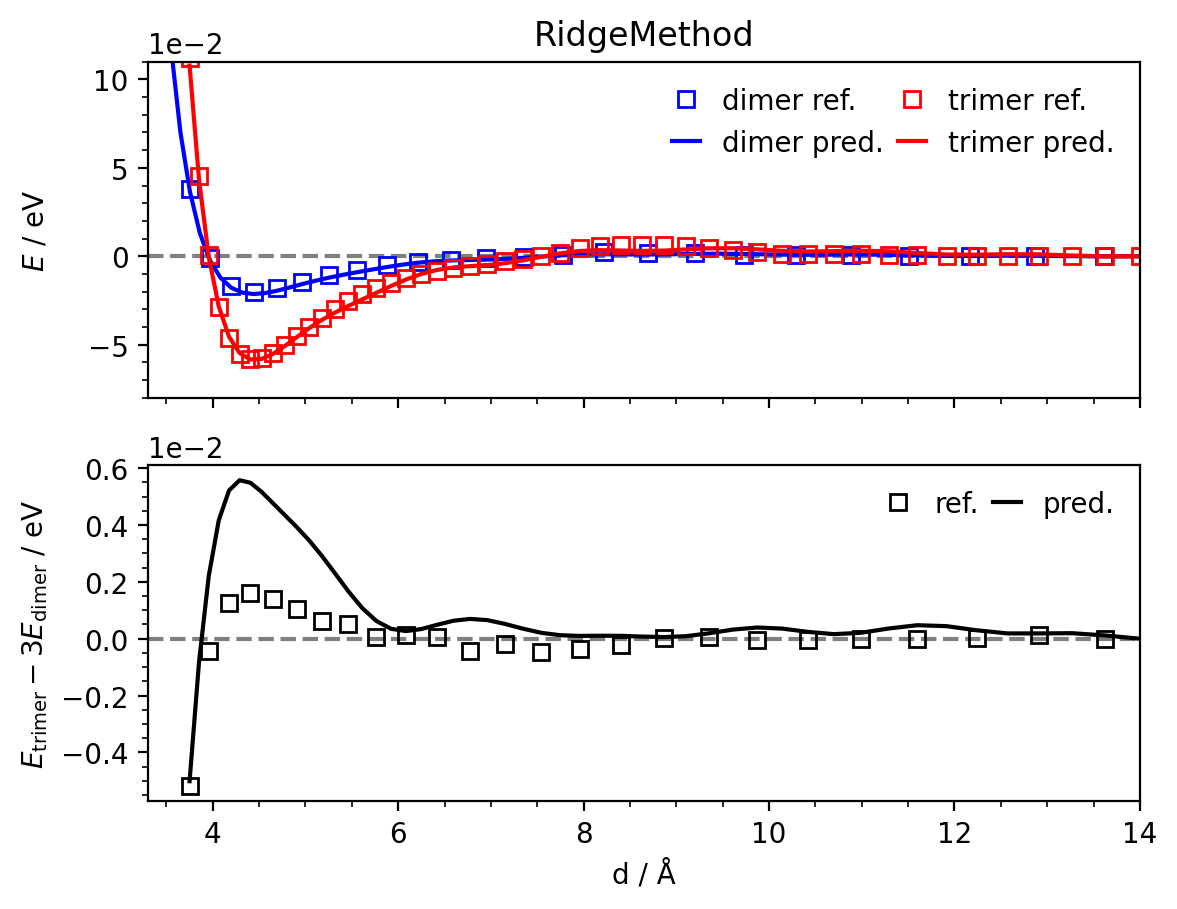

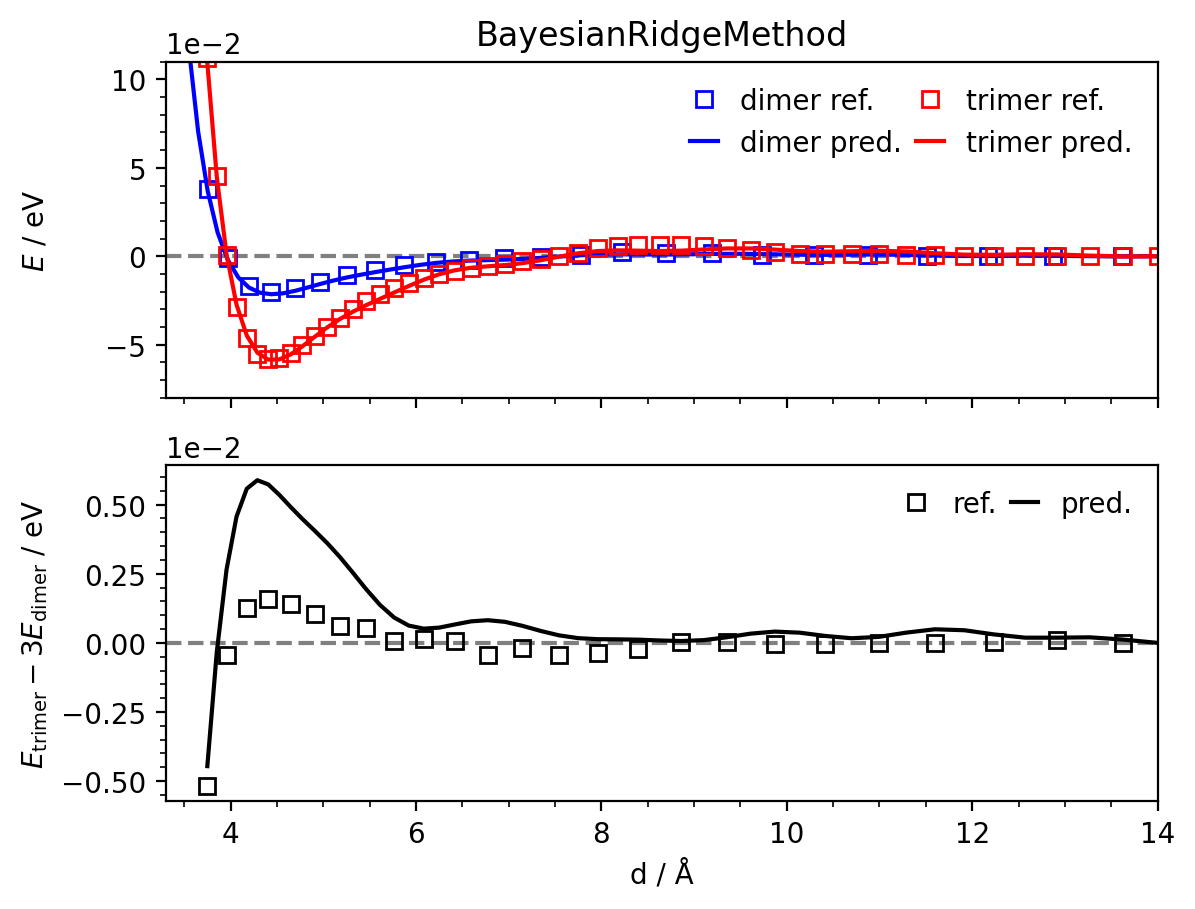

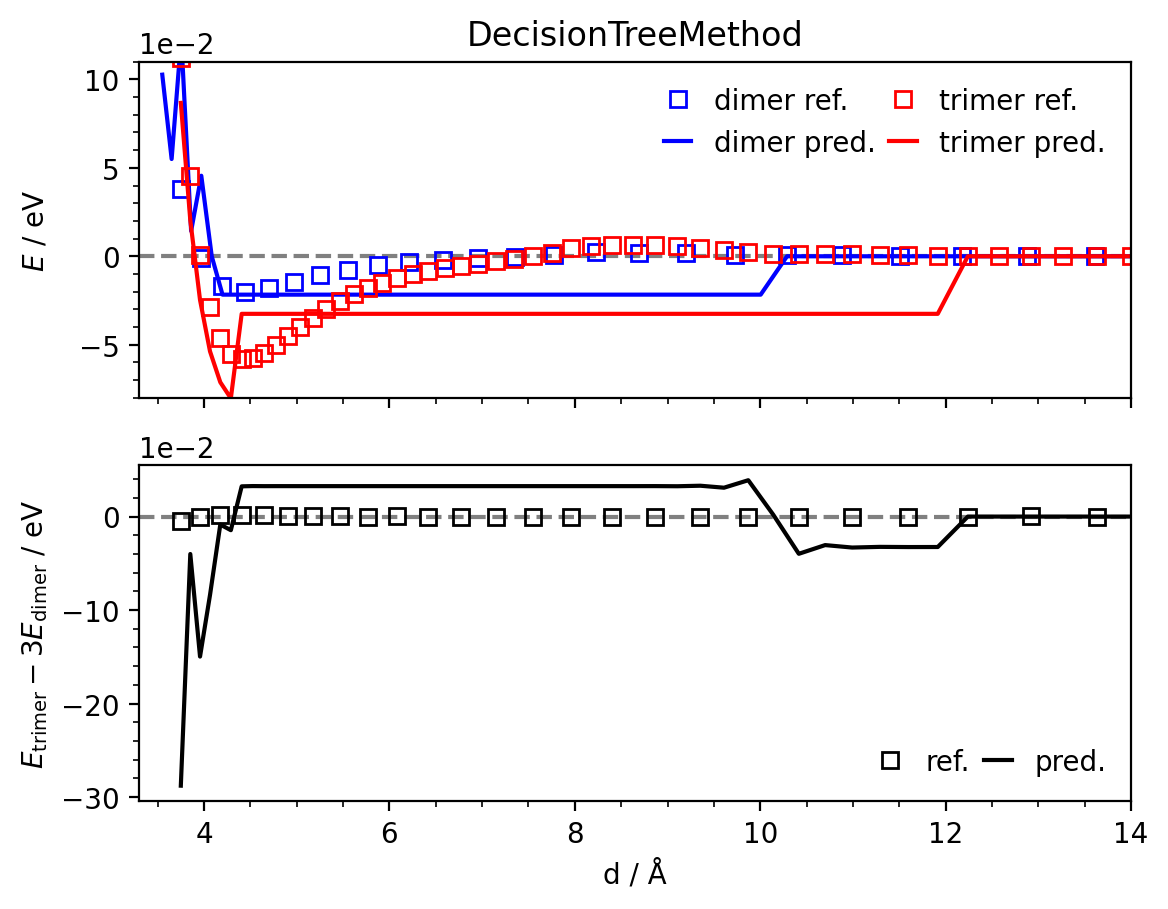

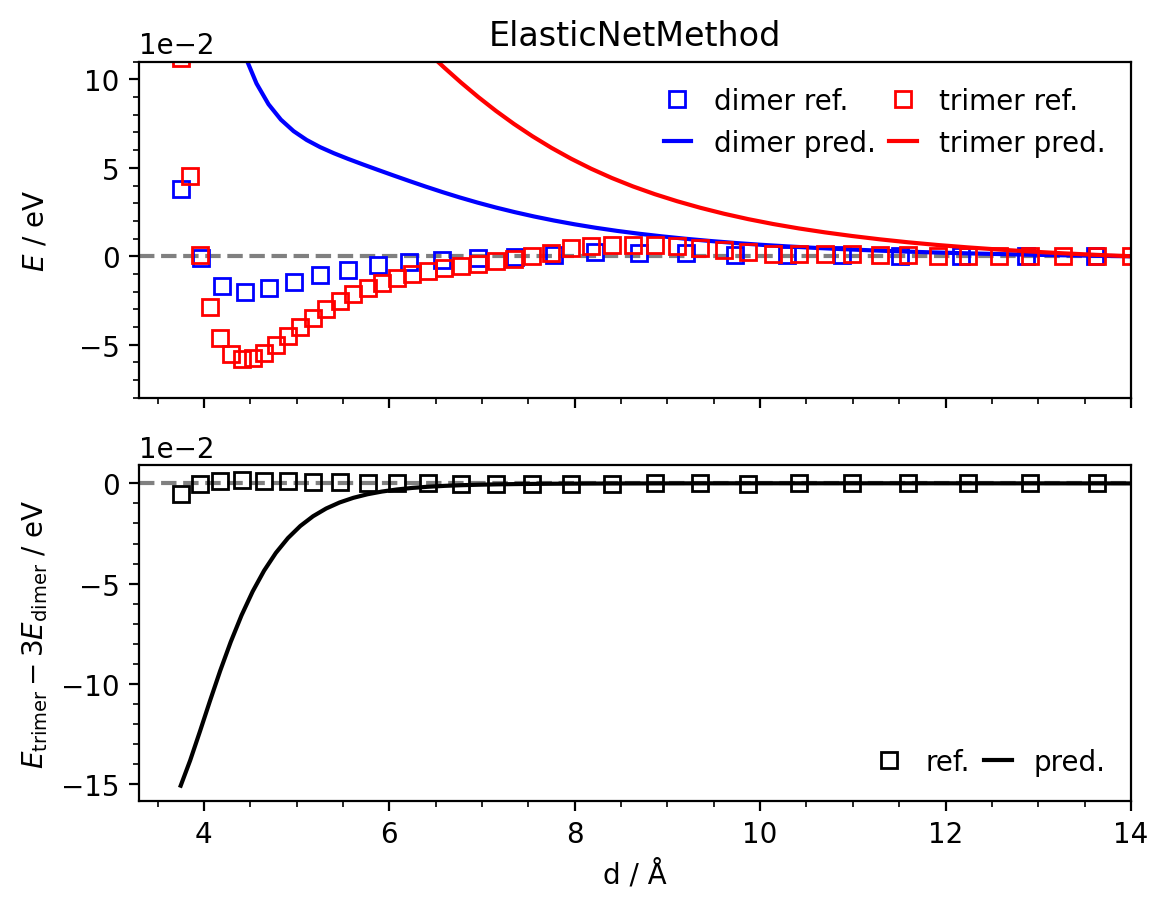

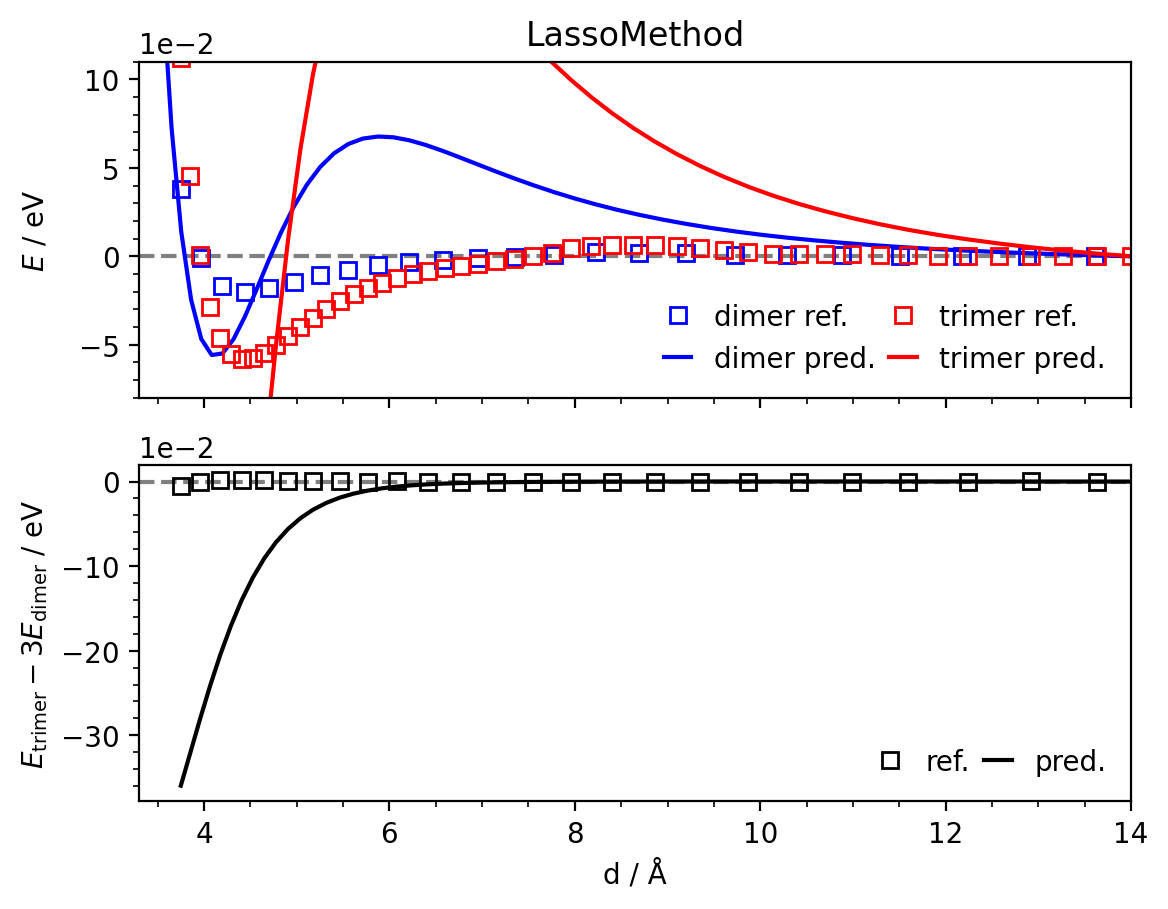

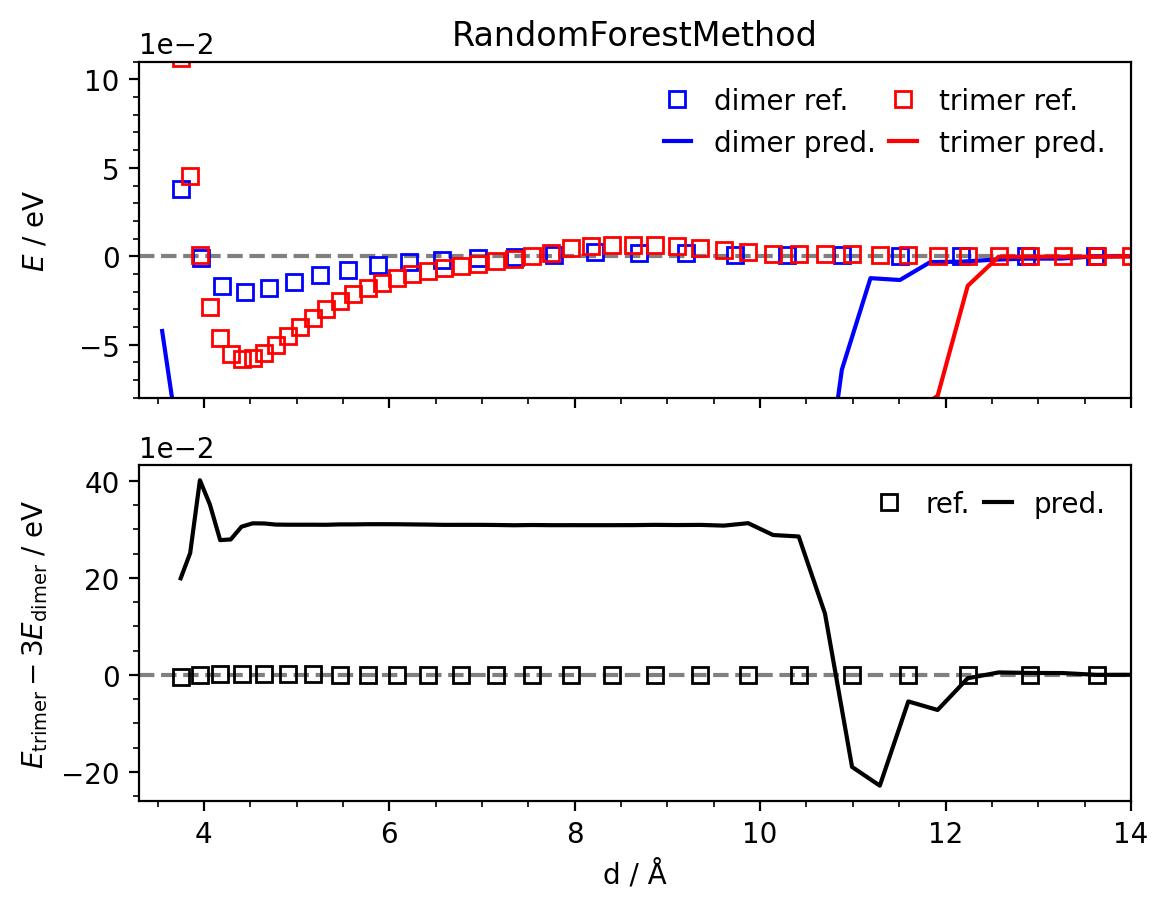

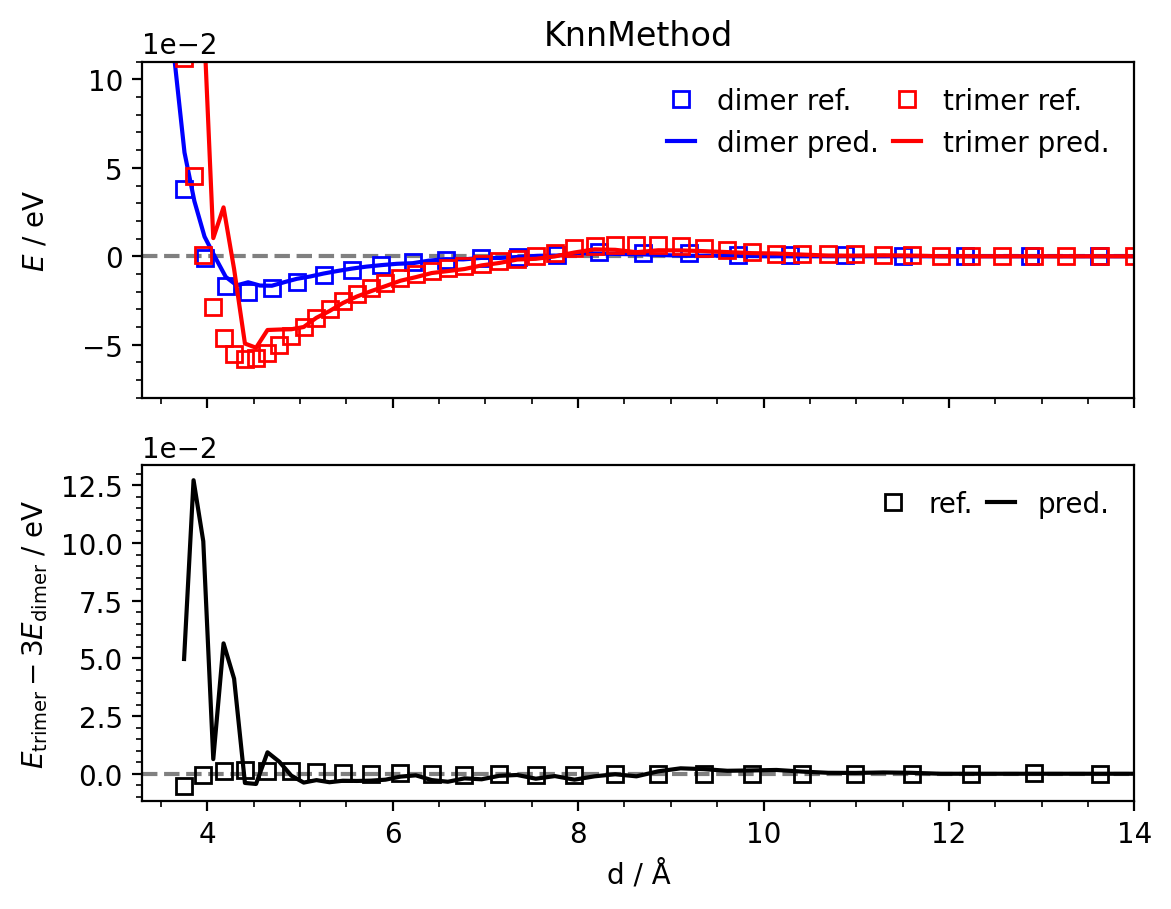

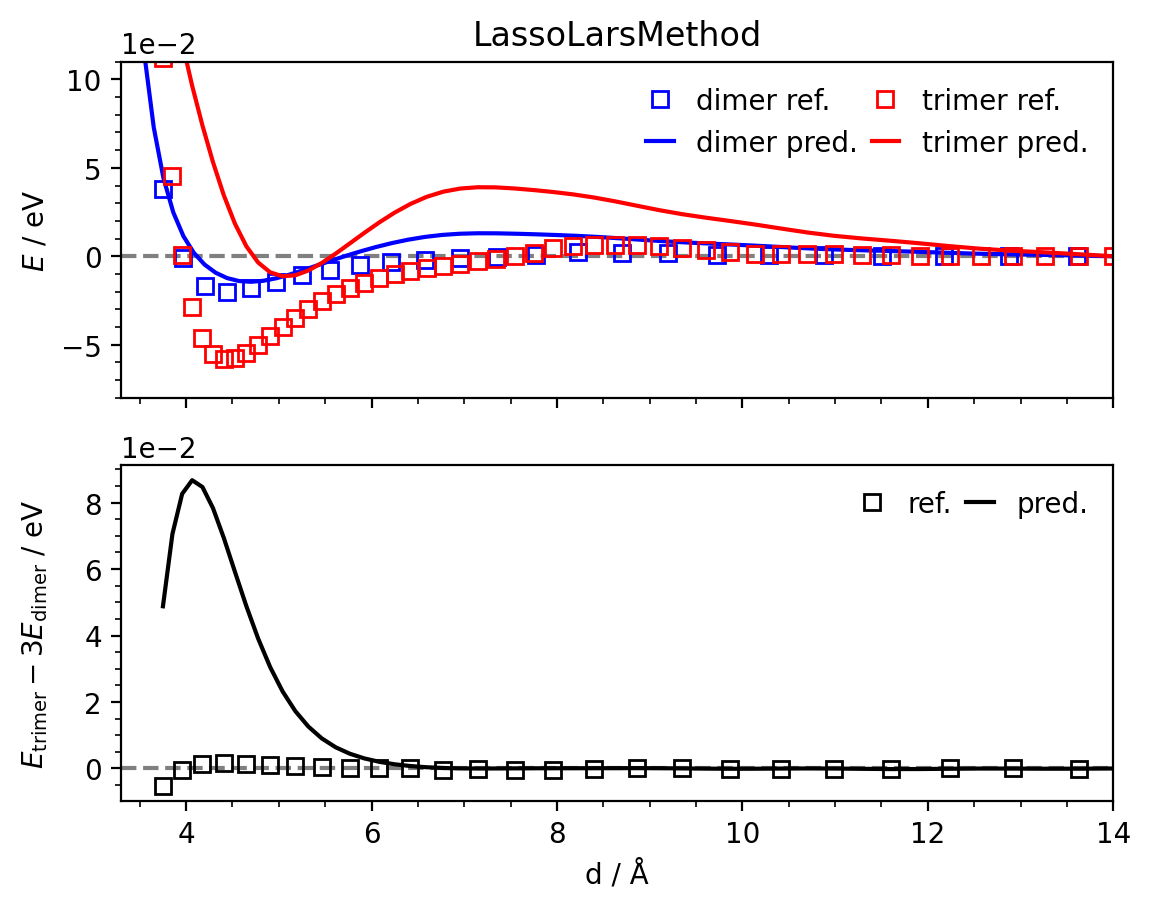

In [75]:
for method in methods:
    m = method(train)
    m.train()
    dimer_energy = (m.predict(preprocess.preprocess(dimer_dataset.X))) * 2
    trimer_energy = (m.predict(preprocess.preprocess(trimer_dataset.X))) * 3
    fig, ax = visualize_energy(dimer_dataset, dimer_energy - dimer_energy[-1], trimer_dataset, trimer_energy - trimer_energy[-1])
    ax[0].set_title(method.__name__)

In [9]:
dimer_energy = (method.predict(dimer_dataset.X)) * 2
trimer_energy = (method.predict(trimer_dataset.X)) * 3

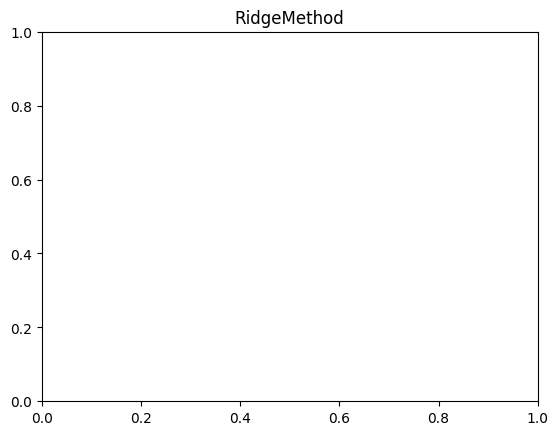

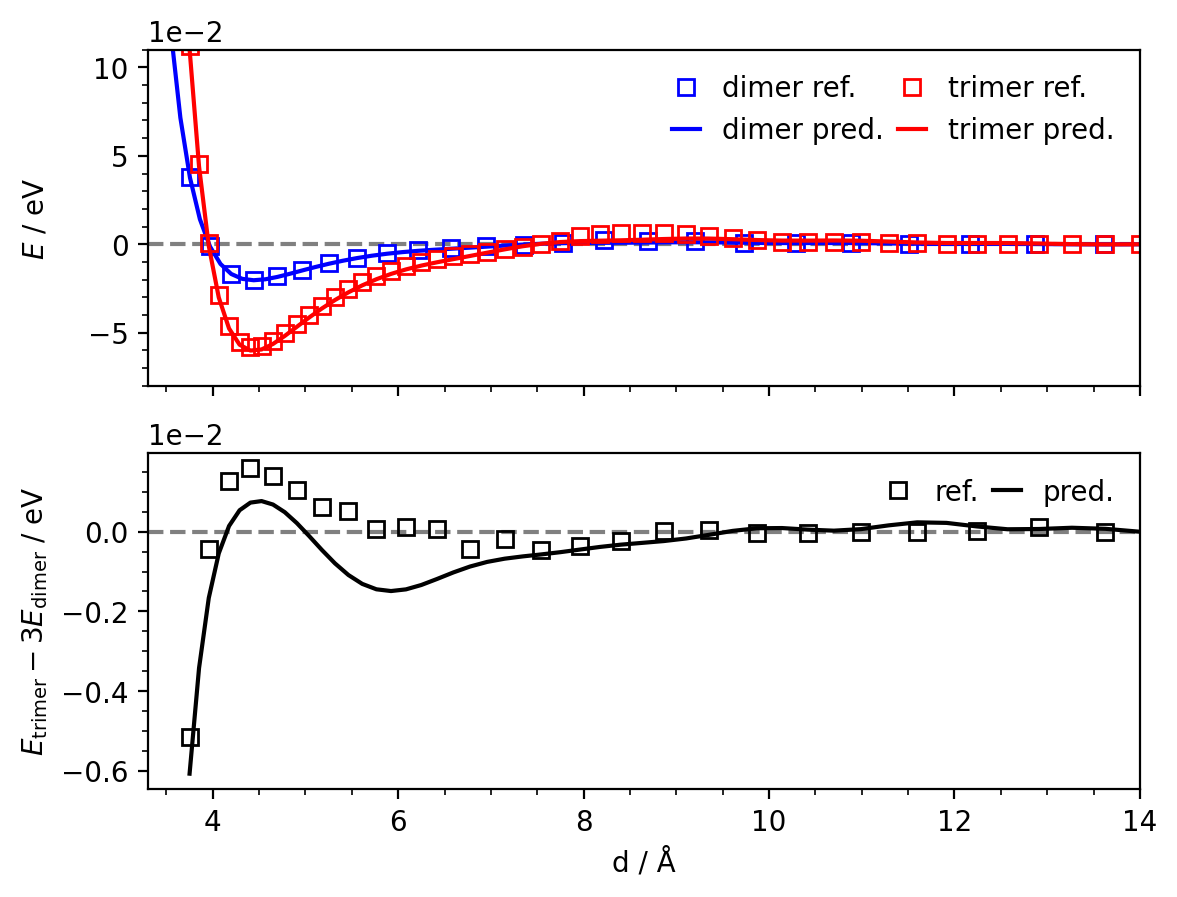

Text(0.5, 1.0, 'RidgeMethod')

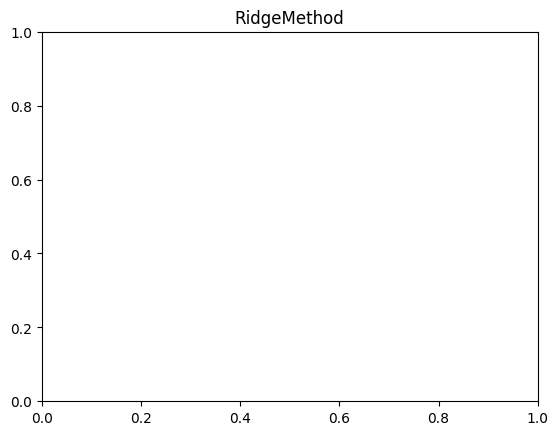

In [14]:
visualize_energy(dimer_dataset, dimer_energy - dimer_energy[-1], trimer_dataset, trimer_energy - trimer_energy[-1])